<a href="https://colab.research.google.com/github/adityapatil4141/Sms-Spam-Classifier/blob/main/Sms_Spam_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [535]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [536]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [537]:
df = pd.read_csv("/content/drive/MyDrive/work files /sms spam classifier/spam.csv",encoding = "ISO-8859-1")

In [538]:
df.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [539]:
df.shape

(5572, 5)

In [540]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

#Data Cleaning

In [541]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [542]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [543]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [544]:
df.head(3)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [545]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['target'] =le.fit_transform(df['target'])


In [546]:
df.head(3)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


In [547]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [548]:
df.duplicated().sum()

403

In [549]:
df = df.drop_duplicates(keep='first')

In [550]:
df.duplicated().sum()

0

In [551]:
df.shape

(5169, 2)

# EDA

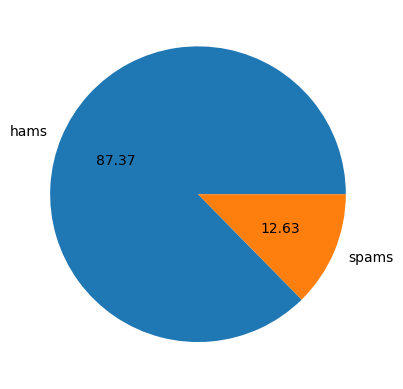

In [552]:
plt.pie(df['target'].value_counts(),labels=['hams','spams'],autopct='%0.2f')
plt.show()

# data is imblanced

In [553]:
import nltk

In [554]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [555]:
df['num_characters'] = df['text'].apply(len)

In [556]:
#num of word

df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [557]:
# number of sentences:

df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [558]:
df.head(3)

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2


In [559]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [560]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [561]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [562]:
# we can clearly see that spam messages average character length is bigger than ham

<Axes: xlabel='num_characters', ylabel='Count'>

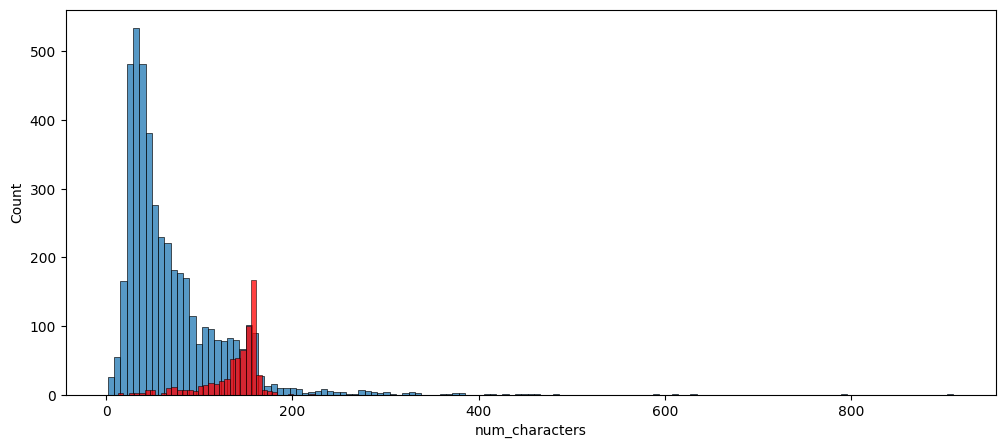

In [563]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

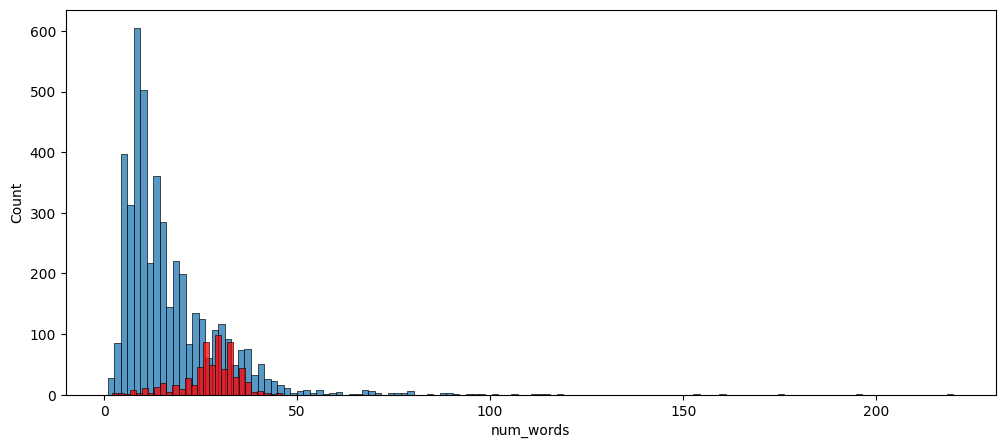

In [564]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

<ipython-input-565-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

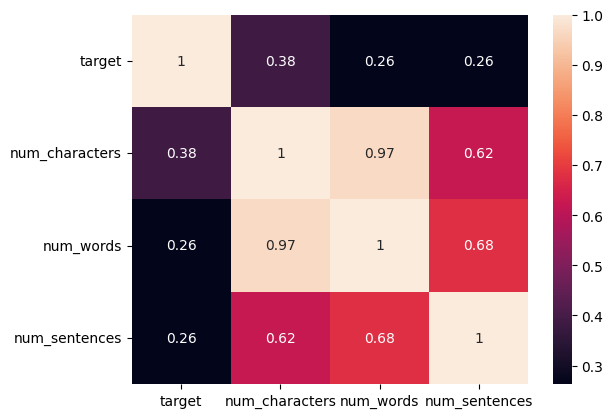

In [565]:
sns.heatmap(df.corr(),annot=True)

#Data Preprocessing

In [566]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [567]:
from nltk.corpus import stopwords
import string

In [568]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


In [569]:
def text_transformer(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():# alnum = alpha-numeric.
      y.append(i)


  text = y[:] #asssigning y to 'text' .... "[:]"" we had to do it because we cannot copy list directly we have to clone it.
  y.clear() #clearing y after assigning to text

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation: # will check word to words(i) and see if stopword == word(i)
      y.append(i)


  text = y[:]
  y.clear()

  for i in text :
    y.append(ps.stem(i))


  return " ".join(y)




In [570]:
df['transformed_text'] = df['text'].apply(text_transformer)

In [571]:
df.head(3)

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...


In [572]:
# WorldCloud - a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance

In [573]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500,min_font_size=10,background_color='white')

In [574]:
span_wc =wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep="  "))

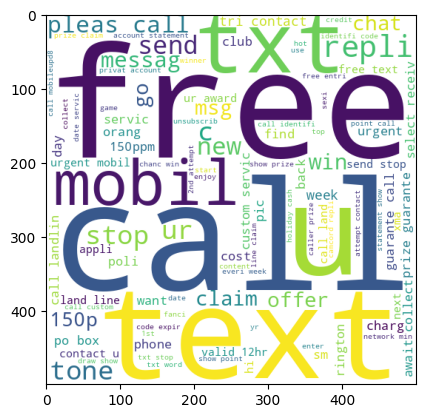

In [575]:
plt.imshow(span_wc)

In [576]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" ")) # getting str and concatenate on space to 'transformed_text'

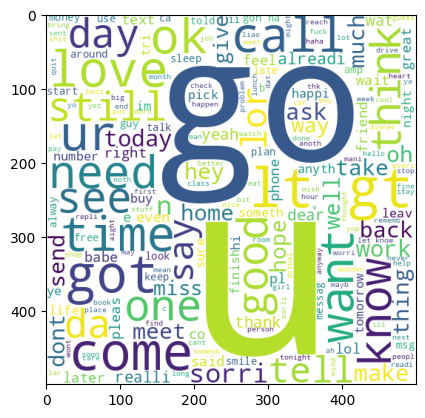

In [577]:
plt.imshow(ham_wc)

In [578]:
# getting most used word in spam:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist(): #will get list of strings
  for i in msg.split(): #iterating through every list(msg) and every word(i)
    spam_corpus.append(i)


In [579]:
len(spam_corpus)

9939

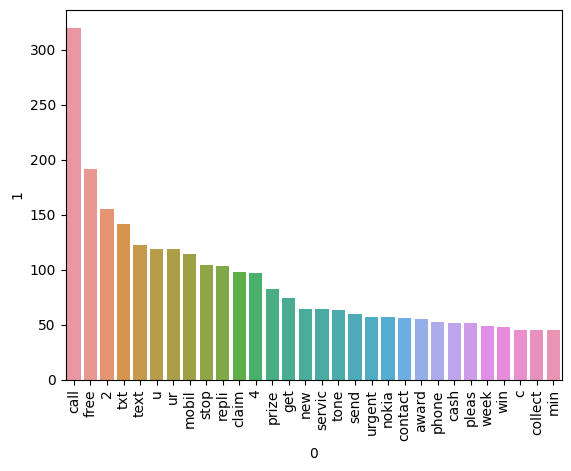

In [580]:
from collections import Counter #it will create a dictionary with count of occurance of each word
sns.barplot(x= pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y =pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()



In [581]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
  for i in msg.split():
    ham_corpus.append(i)

In [582]:
ham_counter = Counter(ham_corpus).most_common(30)

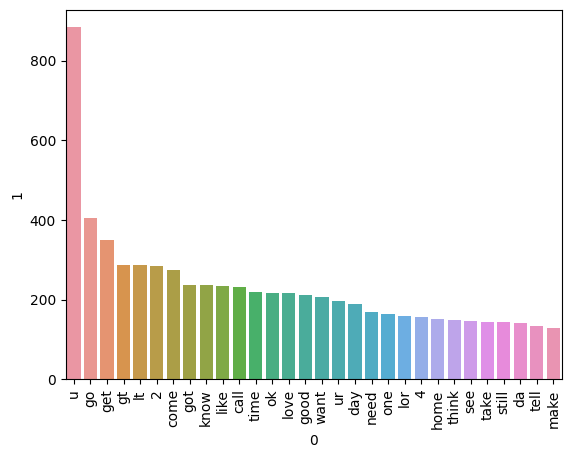

In [583]:
sns.barplot(x=pd.DataFrame(ham_counter)[0],y=pd.DataFrame(ham_counter)[1])
plt.xticks(rotation='vertical')
plt.show()

#Model Building

In [584]:
# We know that naiveBayes algorithm works best on textual data:
# NaiveBayes need numerical data,
# We have to convert text to numerical data/vectors,
# Bagsofword(frequent word) ,tfidf

In [585]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf = TfidfVectorizer()
cv = CountVectorizer()

In [586]:
x = cv.fit_transform(df['transformed_text']).toarray()

In [587]:
x.shape

(5169, 6708)

In [588]:
y = df['target'].values

In [589]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [590]:
from sklearn.model_selection import train_test_split

In [591]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [592]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score


In [593]:
gnb =GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [594]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1 ))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [595]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [596]:
#till noe bernoulli is performing well

bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3 ))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


WITH TFIDF VECTORIZER:


In [597]:
# WITH TFIDF VECTORIZER:

x = tfidf.fit_transform(df['transformed_text']).toarray()

In [598]:
y = df['target'].values

In [599]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [600]:
gnb.fit(x_train,y_train)
y_pred4 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(precision_score(y_test,y_pred4))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [601]:
mnb.fit(x_train,y_train)
y_pred5 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred5))
print(confusion_matrix(y_test,y_pred5))
print(precision_score(y_test,y_pred5))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [602]:
bnb.fit(x_train,y_train)
y_pred6 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred6))
print(confusion_matrix(y_test,y_pred6))
print(precision_score(y_test,y_pred6))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [603]:
# Here we choose TfidfVectorizer --> MultinomialNB

In [604]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [605]:
svc = SVC(kernel = 'sigmoid',gamma=1.0) #Support Vector Classification
mlb = MultinomialNB()
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver = 'liblinear',penalty='11')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50 , random_state = 2)
gbc = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
xgc = XGBClassifier(n_estimators = 50 , random_State = 2)

















In [606]:
clf = {
    'svc' : svc,
    'mlb' : mlb,
    'knc' : knc,
    "dtc" : dtc,
    "lrc" : lrc,
    "rfc" : rfc,
    'abc' : abc,
    'bc' : bc,
    'etc' : etc,
    'gbc' : gbc,
    'xgc' : xgc
}

In [607]:
def train_classifier(clf , x_train,y_train,x_test,y_test):
  clf.fit(x_train,y_train)
  y_predd = clf.predict(x_test)
  accuracy = accuracy_score(y_predd,y_test)
  precision = precision_score(y_predd,y_test)

  return accuracy, precision



In [609]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9729206963249516, 0.8188405797101449)